Summon libraries.

In [2]:
# Summon the library for glm and the library for reading csvs.
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib
import scipy
import numpy as np

Call data.

In [3]:
# Call data. Uses PANDAS.
sleep = pd.read_csv('../../data/Exercise1.4Data.csv')
sleep.head()

,Age,Gender,QuietTime,NChildren,StressLevel,JobStatus,NActivities,PastVac,Sleephours
0,62,F,60,1,5,unempl,1,15,7.7
1,28,F,15,1,6,unempl,5,11,5.3
2,50,M,15,0,5,unempl,1,19,6.4
3,36,M,60,1,6,full,1,21,7.7
4,56,F,50,0,3,part,4,5,7.6


Normality.

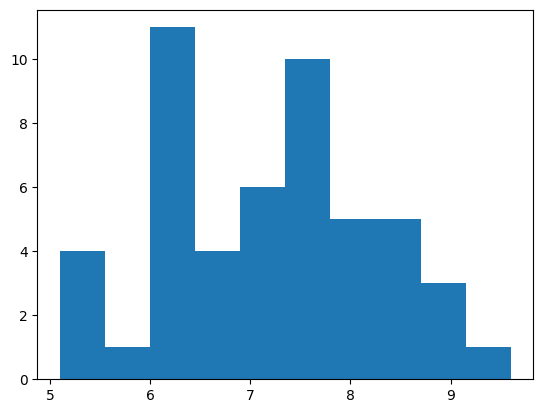

Anderson-Darling test statistic: 0.328
Shapiro-Wilks test statistic: 0.983 
Shapiro-Wilks p-value: 0.676


In [4]:
# Sets the y-value to the y-value[name] for normality tests.
y_val = sleep["Sleephours"]

from matplotlib import pyplot
# Summon histogram. Uses matplotlib.
pyplot.hist(y_val)
pyplot.show()

# Uses scipy.stats for an Anderson-Darling test.
from scipy.stats import anderson
# Assign result from an Anderson-Darling test using the y-value.
result = anderson(y_val)
# Dump out result's test statistic.
print(f'Anderson-Darling test statistic: {result.statistic:.3f}')

# Uses scipy.stats for a Shapiro-Wilks test.
from scipy.stats import shapiro
# Assign results from a Shapiro-Wilks test using the y-value.
statistic, p_value = shapiro(y_val)
print(f"""Shapiro-Wilks test statistic: {statistic:.3f} 
Shapiro-Wilks p-value: {p_value:.3f}""")

Develop models.

In [5]:
# Develop model.
formula = 'Sleephours ~ Age + Gender + QuietTime + NChildren + StressLevel + JobStatus + NActivities + PastVac'
fitted = smf.glm(formula=formula, data=sleep, family=sm.families.Gaussian()).fit()
print(fitted.summary())
fitloglike = (fitted.llf)
print(f'Sigma of fitted model is {np.sqrt(fitted.scale)}.')

                 Generalized Linear Model Regression Results                  
Dep. Variable:             Sleephours   No. Observations:                   50
Model:                            GLM   Df Residuals:                       39
Model Family:                Gaussian   Df Model:                           10
Link Function:               Identity   Scale:                         0.66723
Method:                          IRLS   Log-Likelihood:                -54.620
Date:                Sun, 29 Oct 2023   Deviance:                       26.022
Time:                        01:31:55   Pearson chi2:                     26.0
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5839
Covariance Type:            nonrobust                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.8260 

In [6]:
# Null model.
formula = 'Sleephours ~ 1'
null = smf.glm(formula=formula, data=sleep, family=sm.families.Gaussian()).fit()
nullloglike = (null.llf)

Log likelihood.

In [7]:
# Uses null and fitted log likelihoods to perform the deviance test.
deviance= -2 * (nullloglike-(fitloglike))
print(f"Deviance statistic is {deviance}.")
# Chi2.cdf is from scipy.stats.
from scipy.stats import chi2
pvalue = 1 - chi2.cdf(deviance,10)
print(f"p-value is {pvalue}.")

Deviance statistic is 36.79887401043901.
p-value is 6.131066053782774e-05.


Prediction.

In [8]:
# Prediction.
predict_val = pd.DataFrame(
    {"Age" : 30, "Gender" : 'F', "QuietTime" : 10, "NChildren" : 3, "StressLevel" : 7, "JobStatus" : "full", "NActivities" : 7, "PastVac" : 12}, index=[0])
predict_val = sm.add_constant(predict_val)
# Simpler.
print(f'Predicted: {fitted.predict(predict_val)}')

# Isolated. This one grabs the item "values" from the array.
print(f'Predicted: {fitted.predict(predict_val).values[0]}')

Predicted: 0    6.376164
dtype: float64
Predicted: 6.376164395018729
